In [1]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

In [5]:
# 2. Convert the June temperatures to a list.
June_temperature = list((June))
type(June)

list

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(June_temperature, columns=['Date','June temperature'])
June_df.set_index(June_df['Date'], inplace=True)

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,June temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
December = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12)

In [10]:
# 7. Convert the December temperatures to a list.
December_temperature = list((December))
type(December)

sqlalchemy.orm.query.Query

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_df = pd.DataFrame(December_temperature, columns=['Date','December temperature'])
December_df.set_index(December_df['Date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_df.describe()

,December temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

# Challenge Summary Code

In [14]:
June_stats = June_df.describe()
December_stats = December_df.describe()

Summary_df = June_stats.merge(December_stats, left_index=True, right_index=True)
Summary_df

,June temperature,December temperature
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


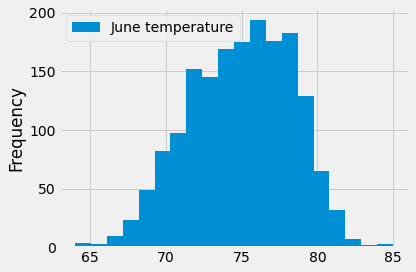

In [15]:
# Plot June results to visualize summary statistics
June_df.plot.hist(bins=20)
plt.tight_layout()

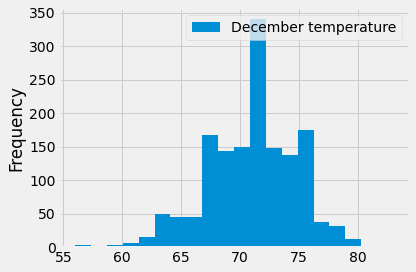

In [16]:
# Plot December results to visualize summary statistics
December_df.plot.hist(bins=20)
plt.tight_layout()